# Box Plots

charts used to compare distribution of values

In [2]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


c:\Users\loren\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us = df_da_us.dropna(subset='salary_year_avg')
df_da_us['salary_year_avg'].sample(10)

664922    127500.0
118787     57500.0
647673     90000.0
297340     80850.0
727016    120000.0
768507     71000.0
556820     97500.0
166762     85000.0
466867     95640.0
400581     73750.0
Name: salary_year_avg, dtype: float64

<Axes: >

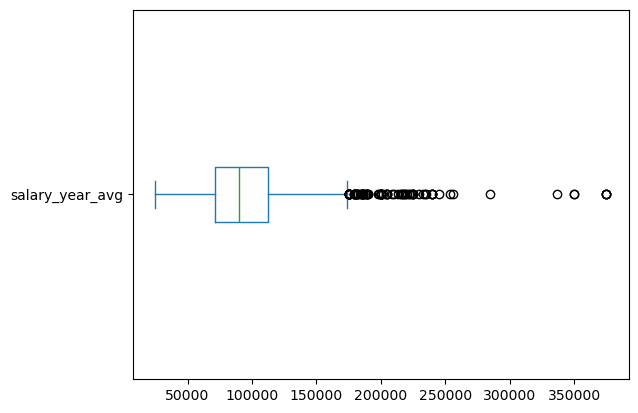

In [ ]:
df_da_us['salary_year_avg'].plot(
    kind='box',
    vert=False, # rotate the chart
)

Now let's plot multiple boxplots for different job titles

C:\Users\loren\AppData\Local\Temp\ipykernel_20724\2006149544.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


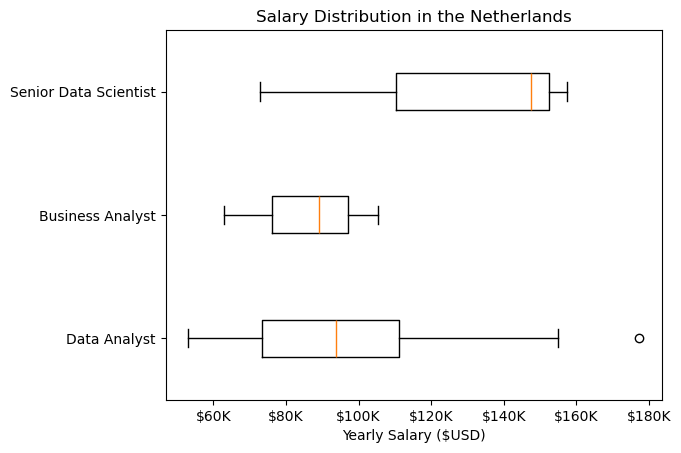

In [16]:
job_titles = ['Data Analyst', 'Business Analyst', 'Senior Data Scientist']

# df filtered by nedtherlands and the list of job titles + drop emplty salaries
df_ned = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='Netherlands')].copy()
df_ned = df_ned.dropna(subset='salary_year_avg')

# create a list with list comprehension including salaries for each job 
job_list = [df_ned[df_ned['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the Netherlands')
plt.xlabel('Yearly Salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### Exercises

🟩 Data Scientist Hourly Salary Box Plot (2.18.1) - Problem
Matplotlib Box Plots
Problem Statement:

Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.
Hint:

Use the DataFrames plot() method to create the box plot. Customize the x-axis and y-axis labels using plt.xlabel() and plt.ylabel().

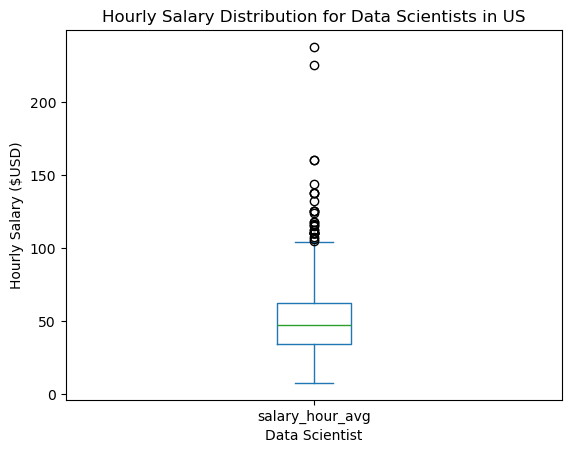

In [ ]:
df_ds = df[(df['job_title_short']=='Data Scientist')&(df['job_country']=='United States')].copy()
df_ds['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientists in US')
plt.show()

🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2) - Problem
Matplotlib Box Plots
Problem Statement:

Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

- Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
- Use list comprehension to create a list of DataFrames for each country.
- Use the plt.boxplot() function to plot this list and specify the labels as countries.
- Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.


C:\Users\loren\AppData\Local\Temp\ipykernel_8508\3251309462.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=countries)


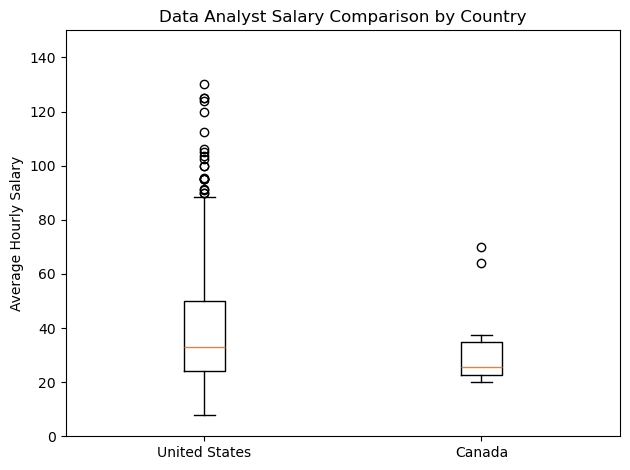

In [27]:
countries = ['United States', 'Canada']
df_da = df[(df['job_title_short']=='Data Analyst')&(df['job_country'].isin(countries))].copy()

# List comprehension to create list of df to plot
country_list = [df_da[df_da['job_country'] == country]['salary_hour_avg'].dropna() for country in countries]

# plot the list 
plt.boxplot(country_list, labels=countries)
plt.ylabel('Average Hourly Salary')
plt.ylim(0, 150)
plt.title('Data Analyst Salary Comparison by Country')
plt.tight_layout()
plt.show()

🟥 Comparison of Hourly Salaries in Canada (2.18.3) - Problem
Matplotlib Box Plots
Problem Statement:

- Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
- Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.


C:\Users\loren\AppData\Local\Temp\ipykernel_8508\4233283073.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles)


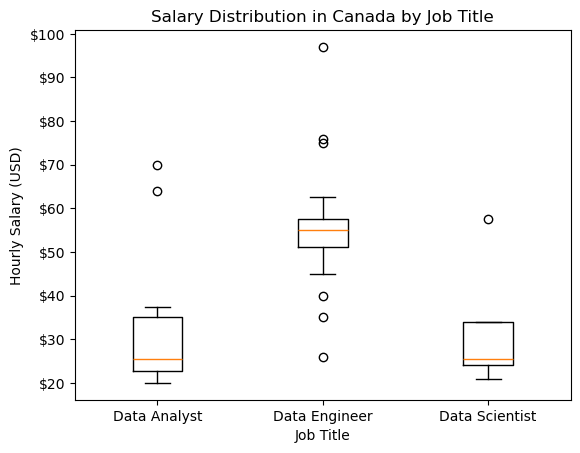

In [51]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_ca = df[(df['job_country']=='Canada')&(df['job_title_short'].isin(job_titles))].copy()

# List comprehension to create list of df to plot
job_list = [df_ca[df_ca['job_title_short'] == title]['salary_hour_avg'].dropna() for title in job_titles] #dropna fundamental for this process

plt.boxplot(job_list, labels=job_titles)
plt.xlabel('Job Title')
plt.ylabel('Hourly Salary (USD)')
plt.title('Salary Distribution in Canada by Job Title')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))

plt.show()
